# Gas usage for residential Germany

In [13]:
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, plot

## Show the usage of gas through Germany

For this we will consider the gas that is used for both : hot water and space heating.

In [14]:
gasUsage = spatial.disagg_households_gas(how = "top-down") # MWh / a
gasUse = gasUsage.sum(axis = 1)
gasUse.sum() / 1e6 # Total gas consumption [TWh / a]

2023-10-08 12:34:08 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


241.16666666666634

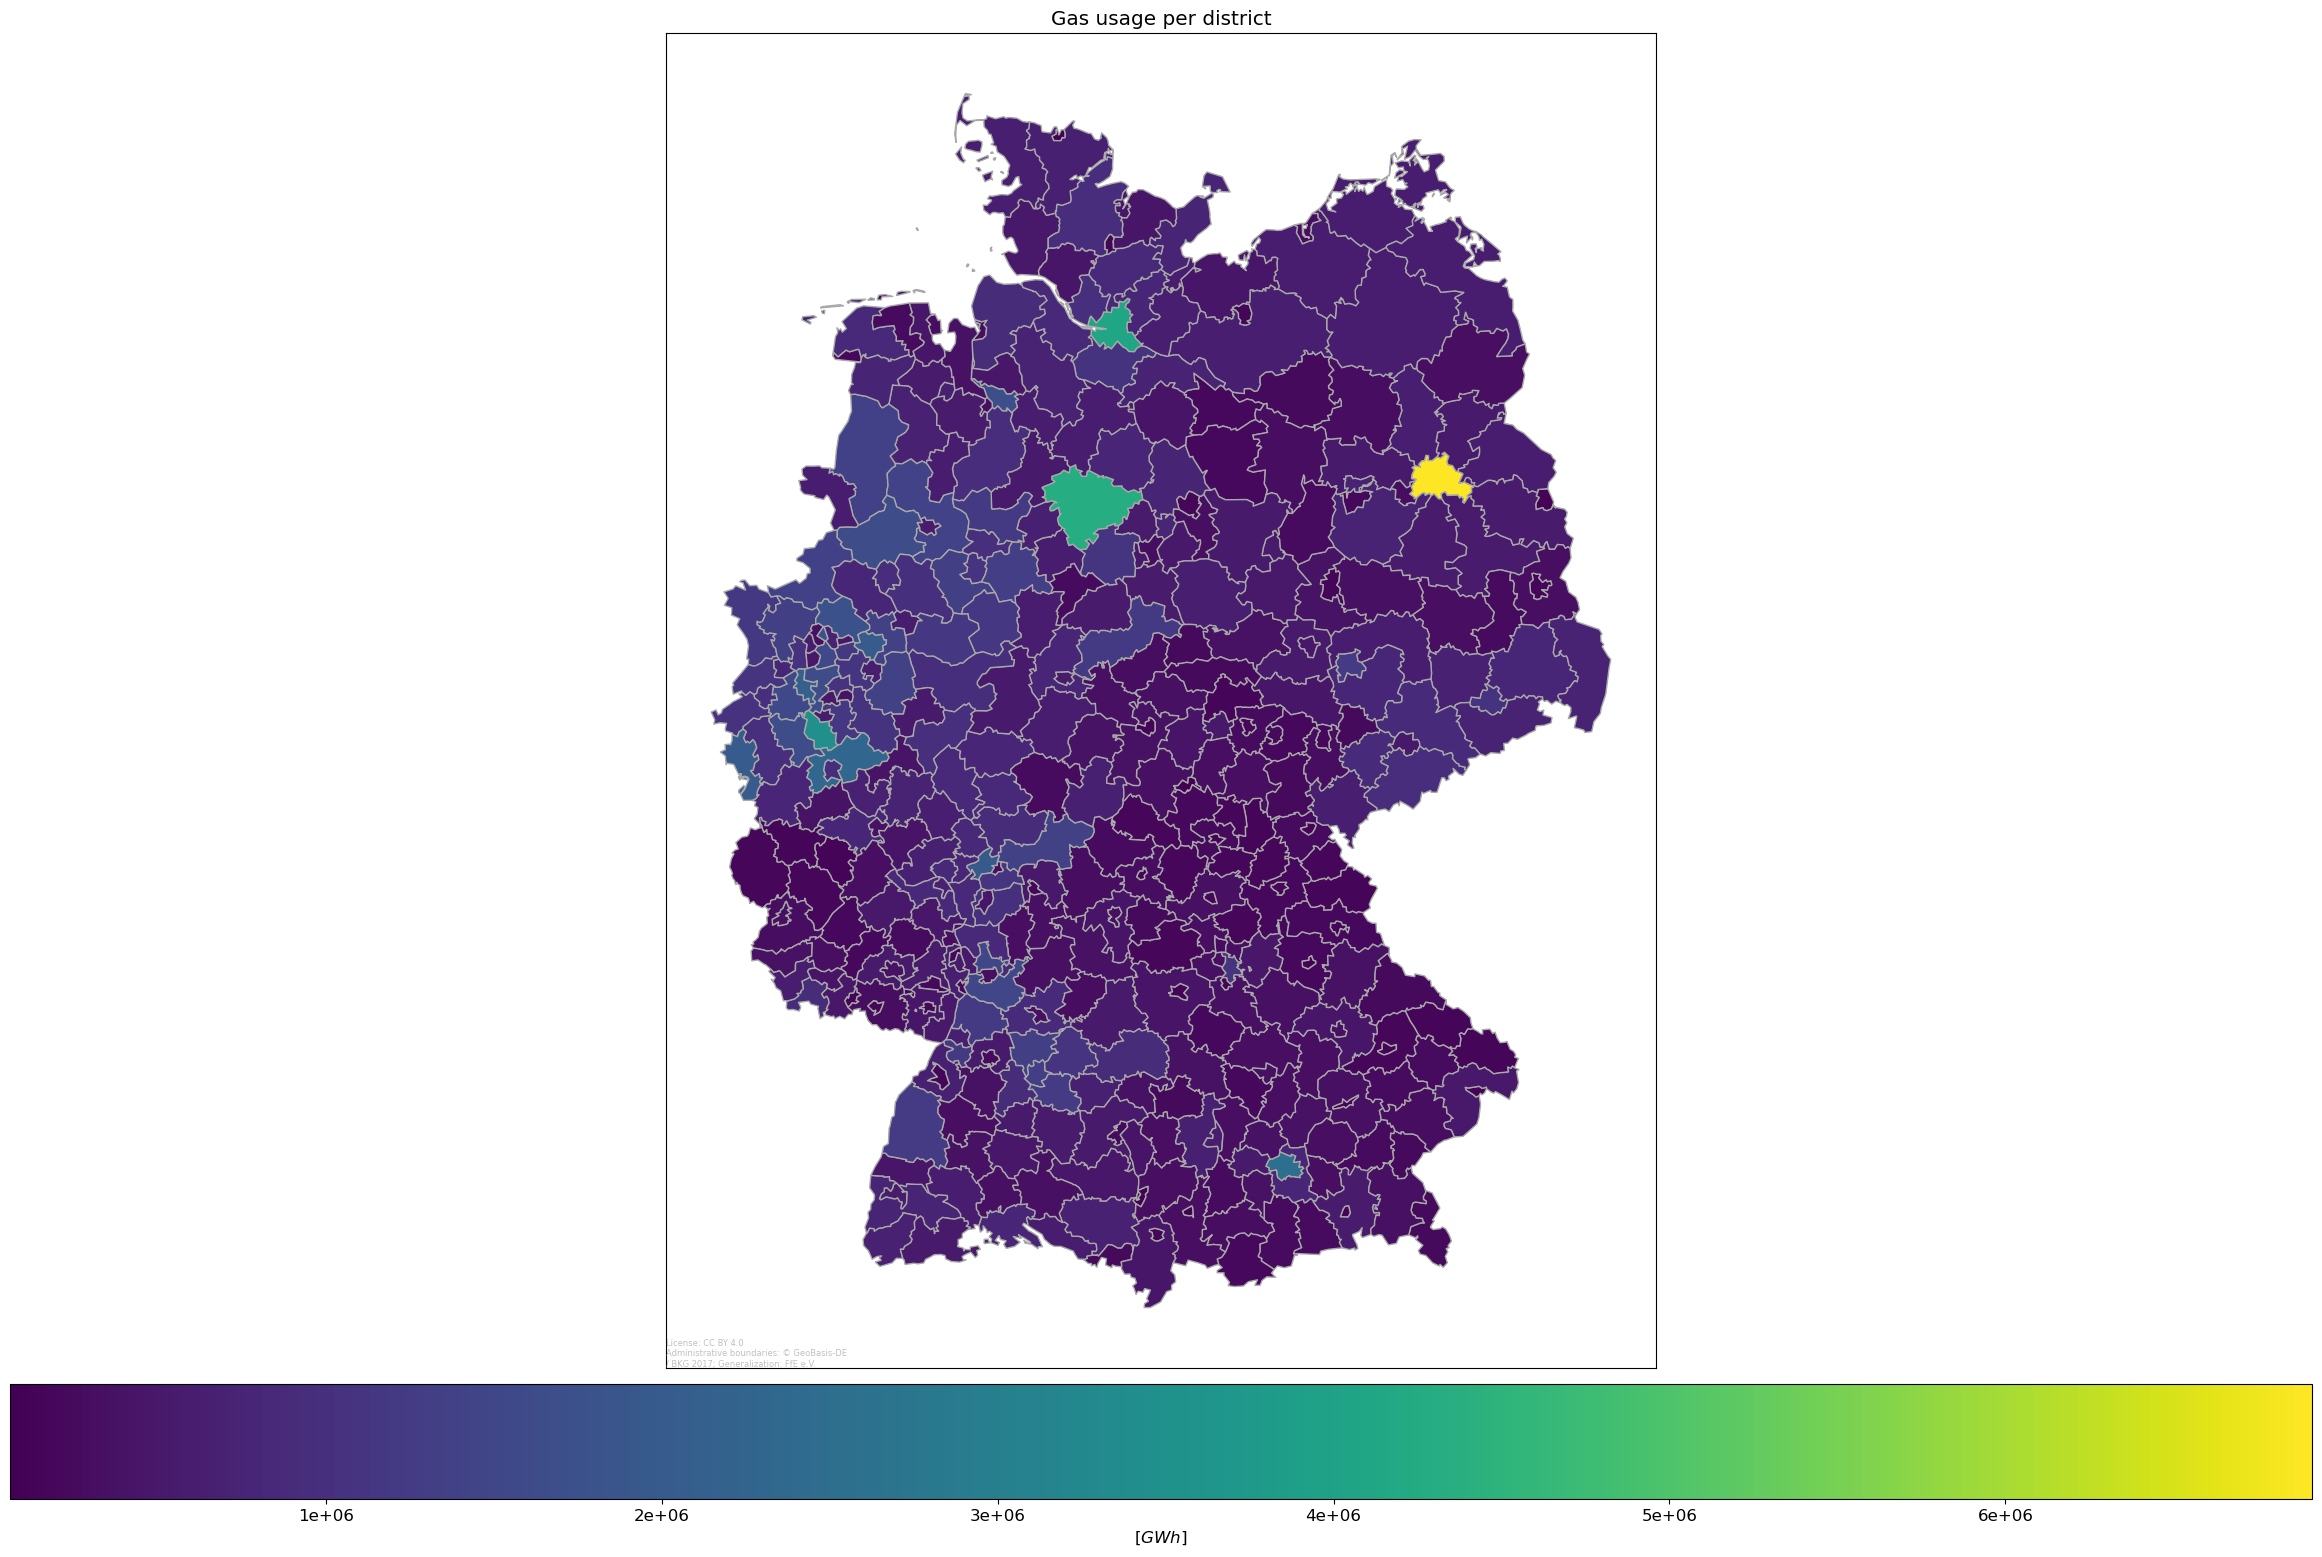

In [15]:
fig, ax = plot.choropleth_map(gasUse, axtitle = "Gas usage per district", unit= "GWh", relative = False) # Relative = divide by area

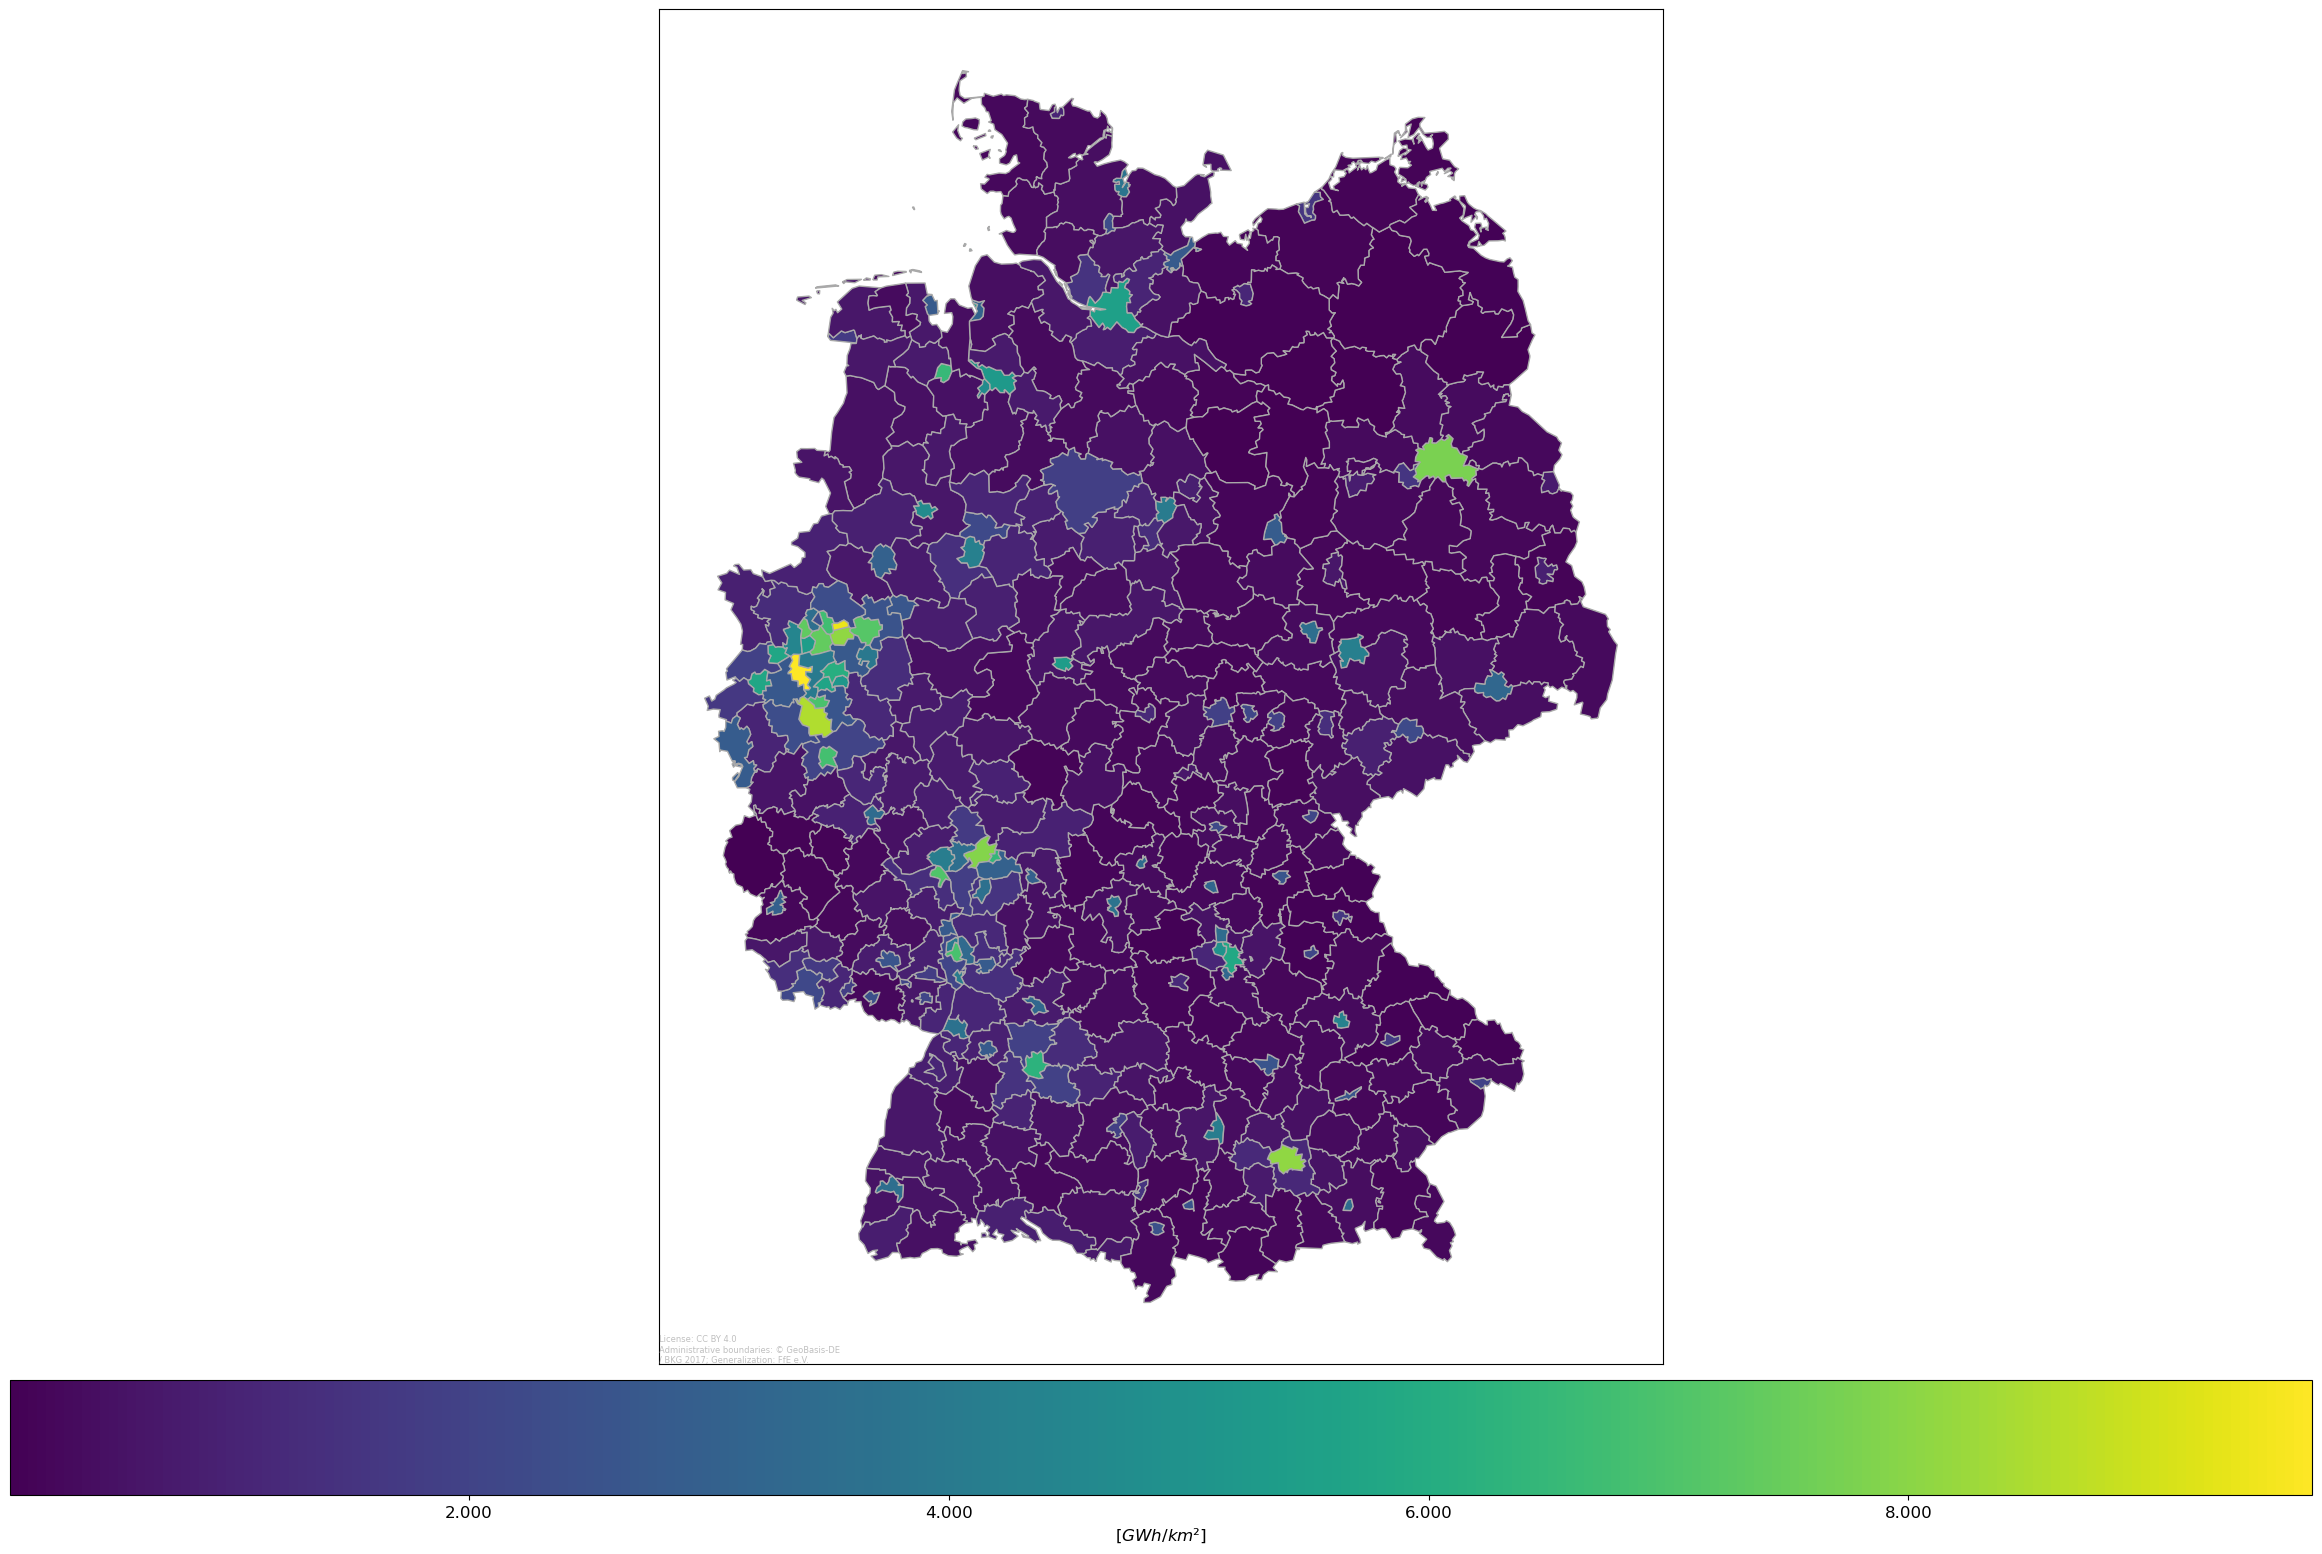

In [16]:
fig, ax = plot.choropleth_map(gasUse, title = "Gas usage per district area", unit= "GWh")

### Gas usage per capita

In [17]:
df_pop = data.population()  # Get the population data

gasUsePop = gasUse / df_pop # Divide to get gas usage per capita
gasUsePop.sum() # Average gas usage per capita [MWh / a]

1187.3478842448844

### Gas usage per household

In [18]:
df_HH = data.households_per_size()
df_HH = df_HH.sum(axis = 1)

gasUseHH = gasUse / df_HH
gasUseHH.sum() # Average gas usage per household [MWh / a]

2650.3030925236367

Merge the two data series into one

In [19]:
gasData = pd.DataFrame(np.array([gasUseHH.tolist(), gasUsePop.tolist()]).T, columns = ["households", "capita"], index = gasUseHH.index.tolist())
gasData

households    capita
DE111    4.506714  2.097131
DE112    5.693441  2.391439
DE113    5.487141  2.385878
DE114    6.057350  2.586684
DE115    5.808729  2.488141
...           ...       ...
DEG0K    5.533398  2.661002
DEG0L    5.784307  2.919097
DEG0M    4.694641  2.462521
DEG0N    5.534422  2.838255
DEG0P    6.270165  2.826726

[401 rows x 2 columns]

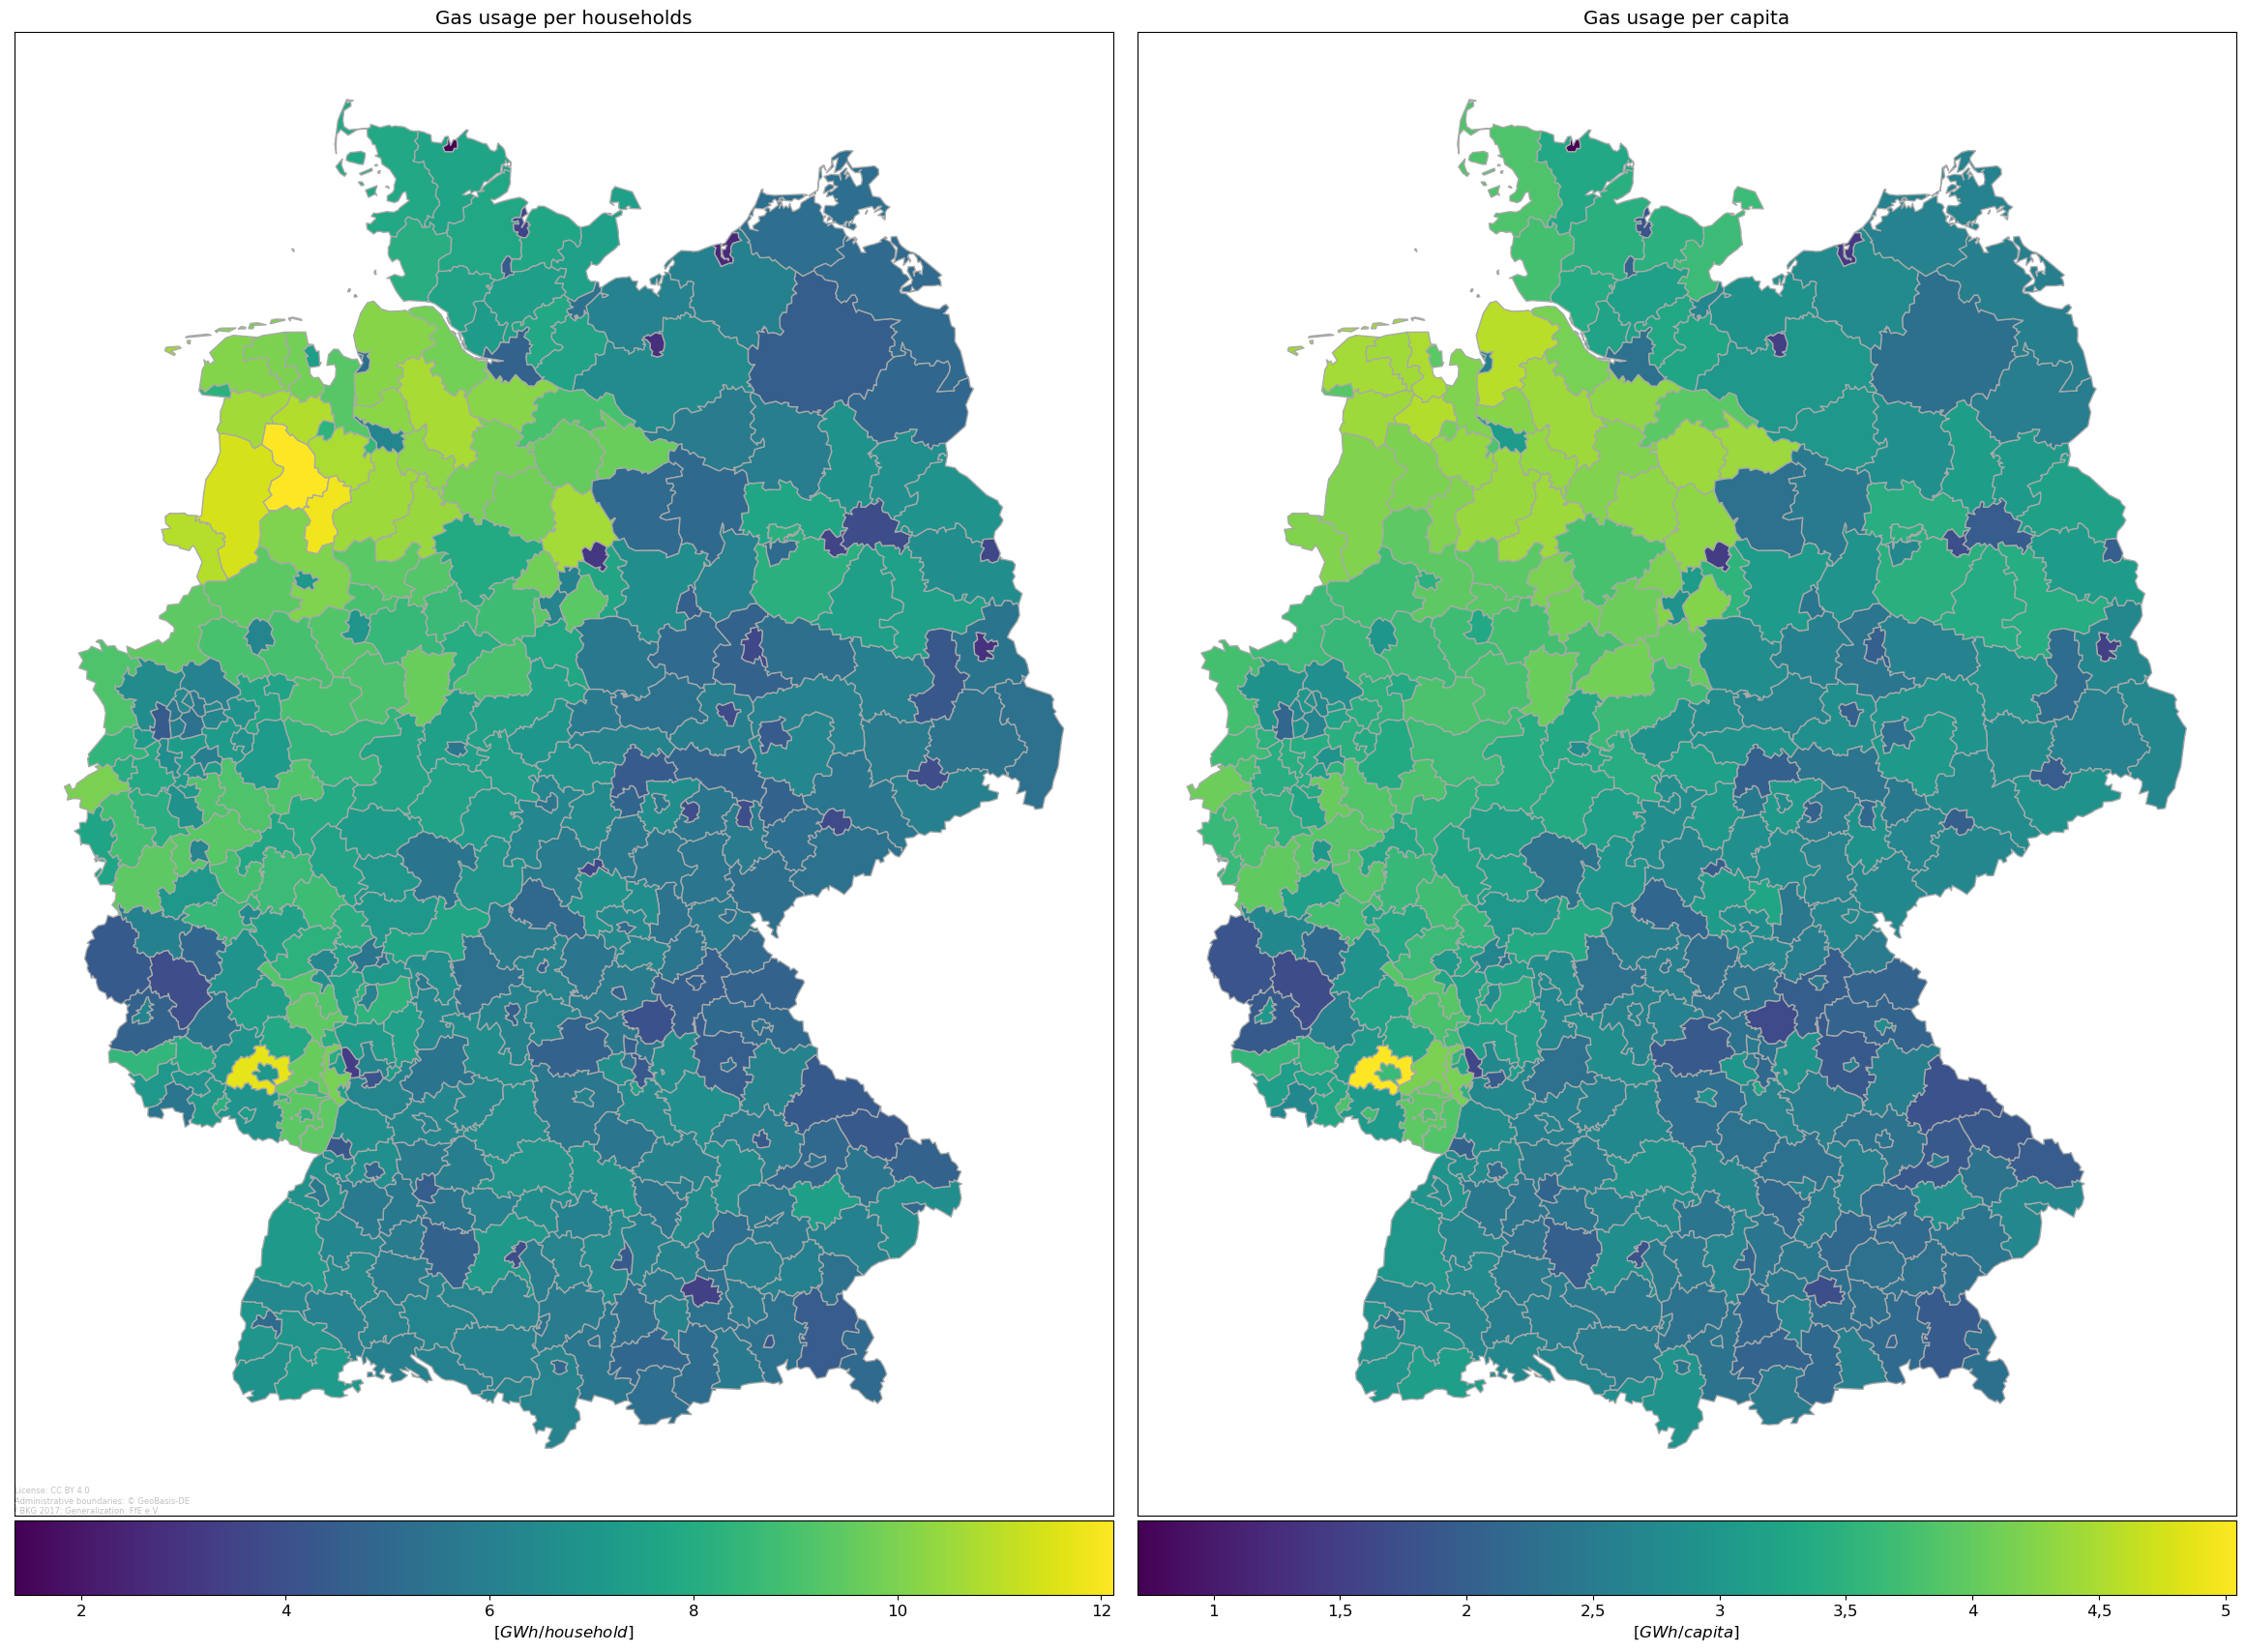

In [20]:
fig, ax = plot.choropleth_map(gasData, axtitle = "Gas usage per", unit = ["GWh/household", "GWh/capita"], colorbar_each_subplot = True, relative = False)

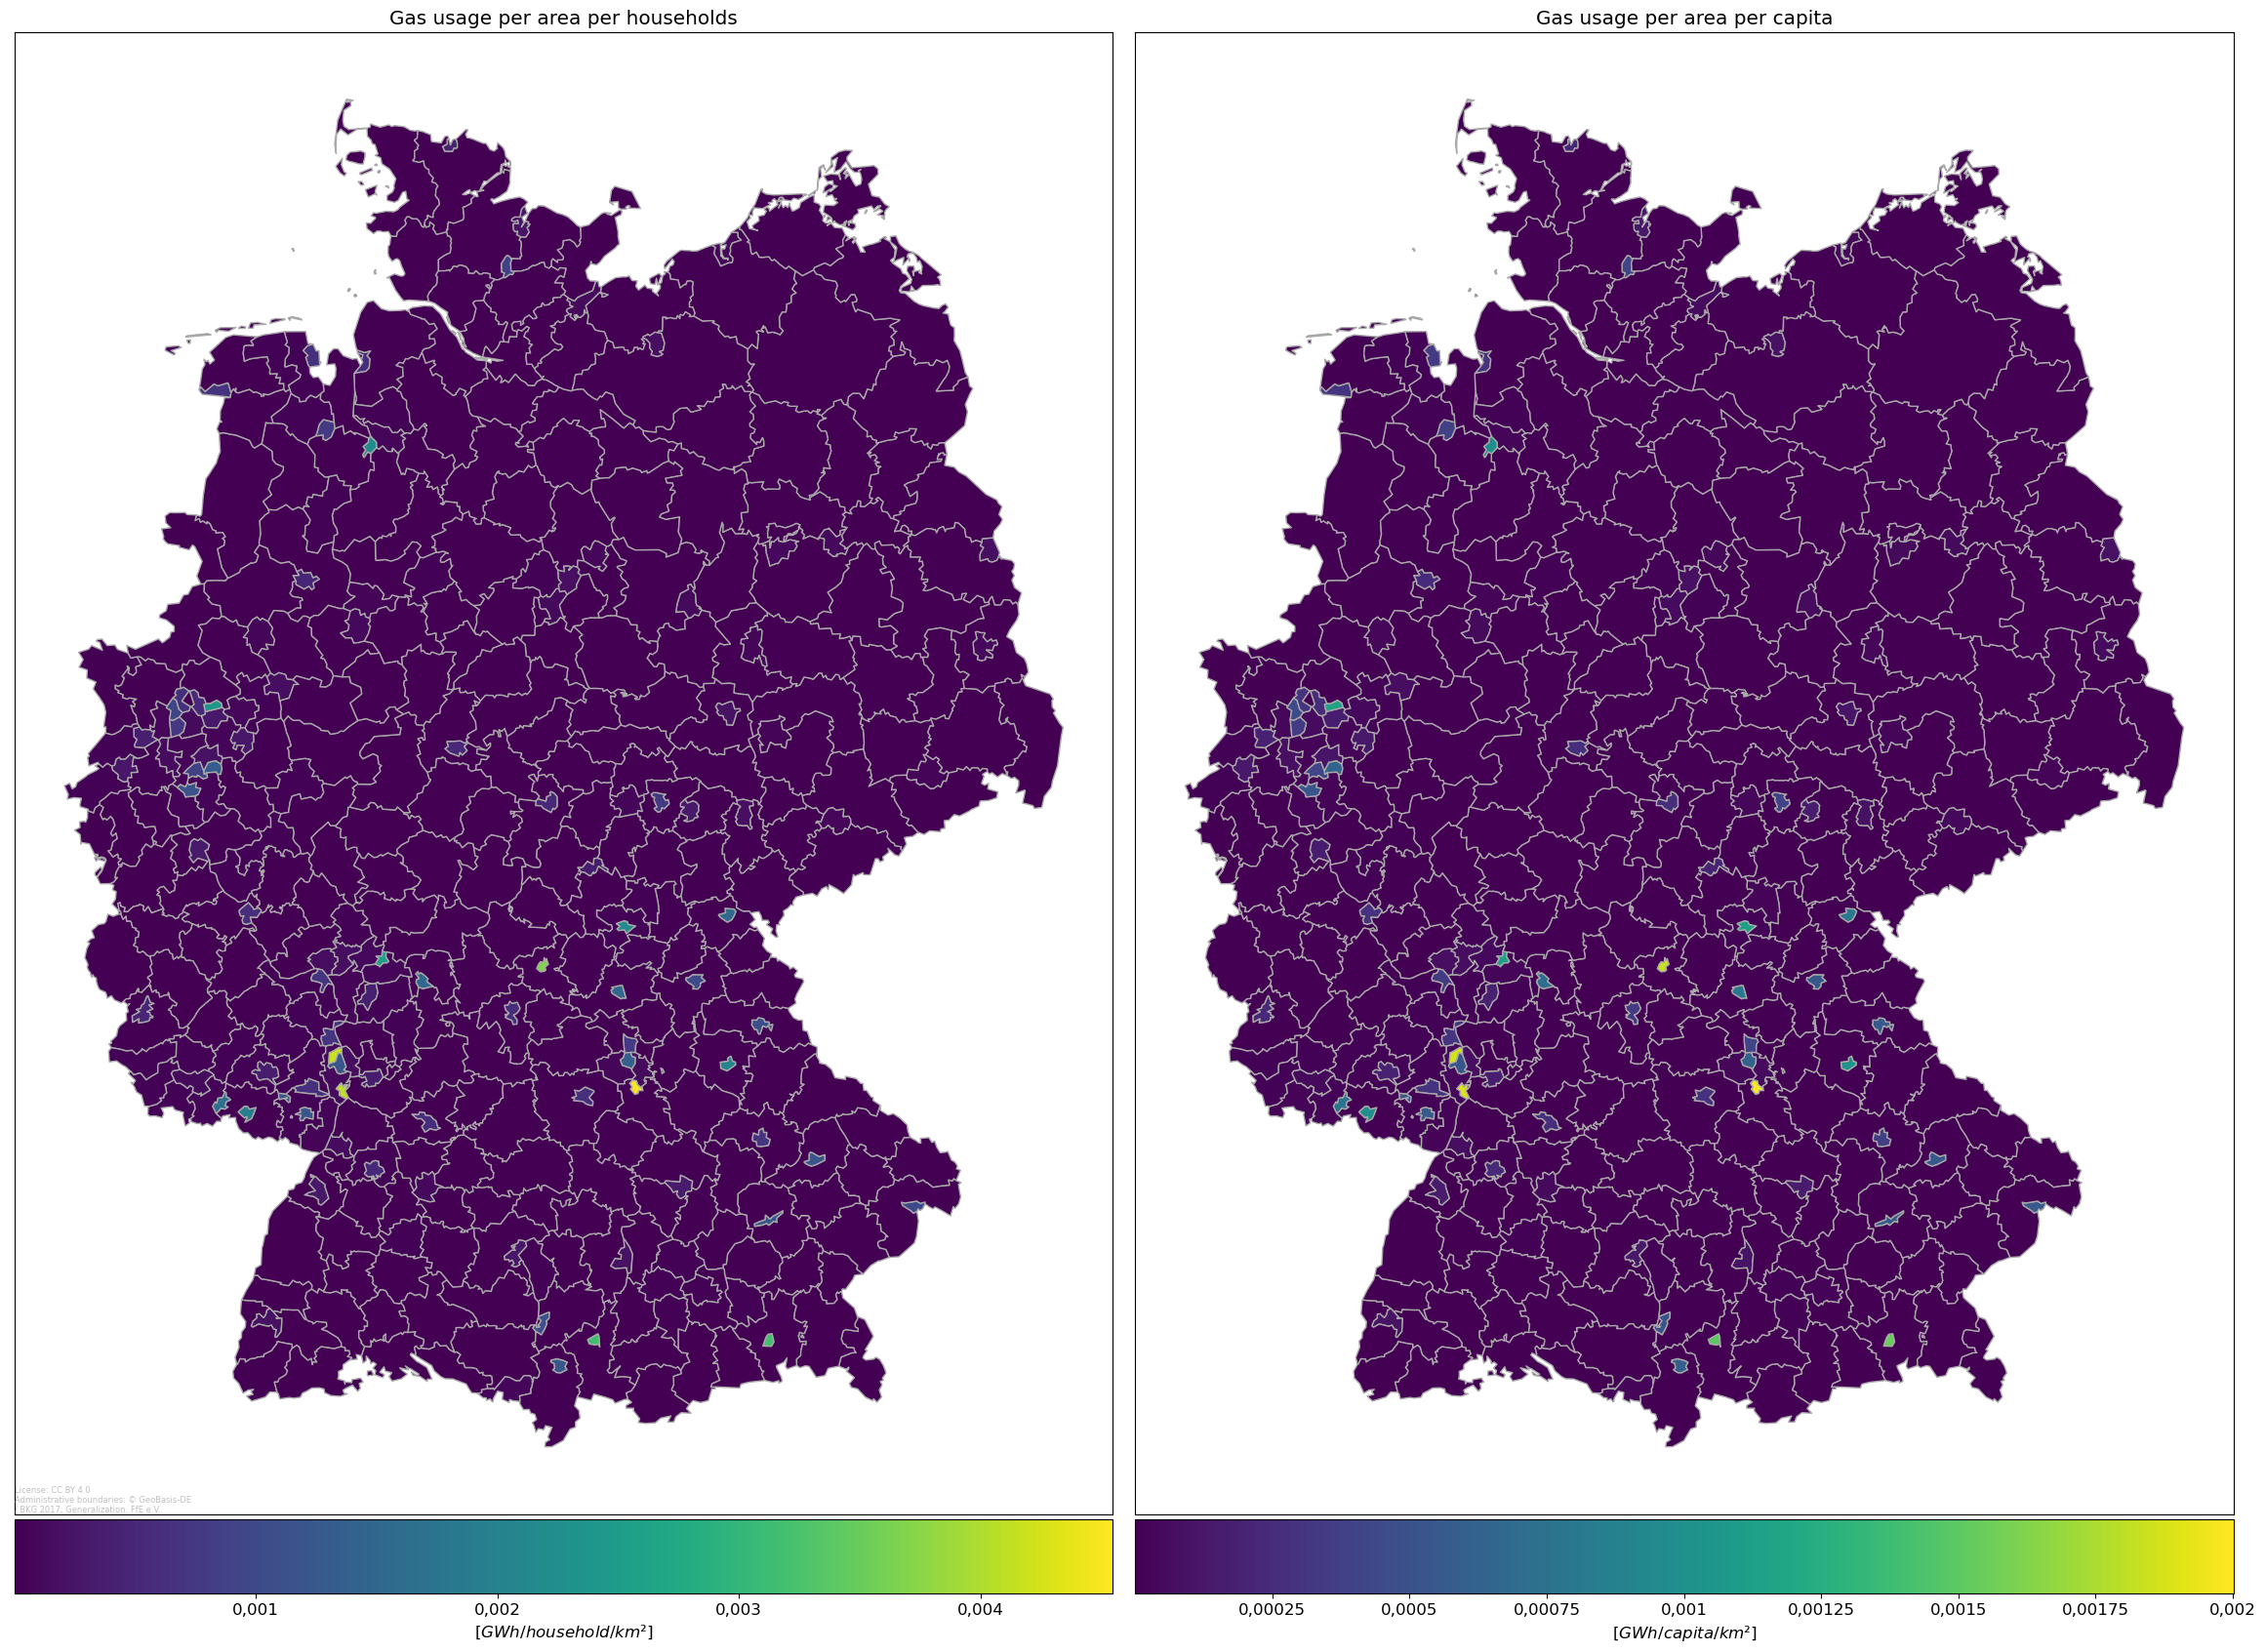

In [21]:
fig, ax = plot.choropleth_map(gasData, axtitle = "Gas usage per area per", unit = ["GWh/household", "GWh/capita"], colorbar_each_subplot = True, relative = True)

We can see that there is not a huge difference between the per capita and the per household maps, as they's a ration of around 2 persons per household.

## Adding the pipes to the network

In [22]:
gasData

households    capita
DE111    4.506714  2.097131
DE112    5.693441  2.391439
DE113    5.487141  2.385878
DE114    6.057350  2.586684
DE115    5.808729  2.488141
...           ...       ...
DEG0K    5.533398  2.661002
DEG0L    5.784307  2.919097
DEG0M    4.694641  2.462521
DEG0N    5.534422  2.838255
DEG0P    6.270165  2.826726

[401 rows x 2 columns]